## Hebbian Neural Network 

In [1]:
import numpy as np
import network as nt
import matplotlib.pyplot as plt

In [2]:
from scipy.special import expit as sig # Sigmoid squashing function

### System Parameters

* Input Layer Size (i.e. number of input neurons)
* Hidden Layer Size (i.e. number of hidden neurons)
* Output Layer Size (only used for extracting results based on states of connected hidden layers
* Learn rate: Rate at which we adjust a neurons weight

In [3]:
IPT_SIZE = 20  
HDN_SIZE = 10 
OUT_SIZE = 4  
LEARN = 0.01

### State Vectors
Current nueron activation states

In [4]:
v_i = np.random.rand(IPT_SIZE,1) # Input vector
v_n = np.random.rand(HDN_SIZE,1) # Hidden layer neurons

### Time-dependent Weights
- $\hat{W}_{i}(t)$: Input to hidden layer weights

In [5]:
W_i = np.random.randint(2,size=(HDN_SIZE,IPT_SIZE))

* $\hat{W}_{h}(t)$: Intra-hidden neuron weights

In [6]:
W_h = np.random.rand(HDN_SIZE,HDN_SIZE) # Hidden layer internal weights

### Time-independent Structure
* $\hat{S}_{i}$: Structural time-independent input to hidden weights

In [7]:
S_i = np.random.randint(2, size=(HDN_SIZE,IPT_SIZE)) # Input to hidden structure (Time indipendent)

* $\hat{S}_h$: Time-independent intra-hidden neuron weight

In [8]:
S_h = np.random.randint(2, size=(HDN_SIZE,HDN_SIZE)) # Hiddden layer structure (Time indipendent)

* $\hat{S}_o$: Time-independent hidden to output structure

In [9]:
S_o = np.random.randint(2, size=(OUT_SIZE,HDN_SIZE)) # Hidden to output structue (Time indipendent)

### Update Algorithm
At each time step $t$:
* State at next step will be: $v_{i}(t+1) =\text{tanh}\left(\hat{S}_{i}\star\hat{W_i}(t)\middle|\hat{S}_{h}\star\hat{W_h}(t)\right)(v_{i}(t)|v_{h}(t))$
* Activity change is then: $\text{d}v = v_{i}(t+1)-v(t)$
* Adjust weights based on correlation of $\text{d}v$ giving

$W_{h}(t+1)=W_{h}(t)+\text{tanh}(L\text{d}v^{T}\text{d}v)$

In [10]:
def update():
    "One update step of network, update outputs and weightings"
    global W_i,W_h,S_i,S_h,v_n
    o = np.tanh(np.multiply(np.concatenate((W_i,W_h),axis=1),np.concatenate((S_i,S_h),axis=1)).dot(np.concatenate((v_i,v_n),axis=0)))
    dt = o-v_n  # Change in nueron output
    W_h = W_h+np.tanh(LEARN*dt.T*dt) # Update weights of hidden layer 
    v_n = o

### Output
We read output base on output structure using:

$v_{o}=\text{sig}\left(\hat{S}_{o}v_{h}(t)\right)$

In [11]:
def read_outputs():
    return sig(S_o.dot(v_n))

#### Example using class from module

In [12]:
C = nt.NeuralNet(0.01,S_i,S_h,S_o)

In [13]:
C.vi = np.random.rand(20).reshape(1,20).T

In [14]:
To = list()
Tw = list()

C.v_i = np.random.rand(20).reshape(1,20).T

for i in xrange(50):
    To.append(np.copy(C.read_outputs()))
    Tw.append(np.copy(C.v_h))
    C.update()
    
C.v_i = np.random.rand(20).reshape(1,20).T
    
for i in xrange(50):
    To.append(np.copy(C.read_outputs()))
    Tw.append(np.copy(C.v_h))
    C.update()
    
Vo = np.rollaxis(np.dstack(To),2)
Vw = np.rollaxis(np.dstack(Tw),2)

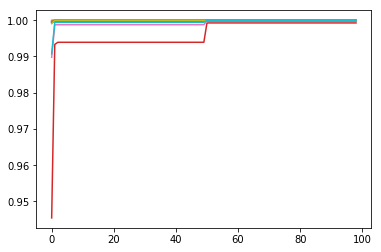

In [15]:
plt.plot(Vw[1:,:,0])
plt.show()

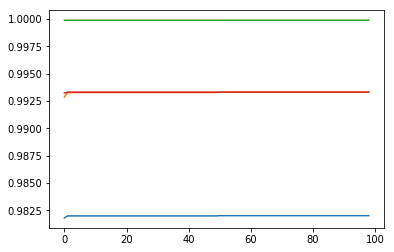

In [16]:
plt.plot(Vo[1:,:,0])
plt.show()

In [19]:
C.S_h

array([[0, 1, 0, 1, 1, 1, 0, 0, 1, 1],
       [0, 0, 1, 1, 0, 1, 1, 0, 1, 1],
       [1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 1, 1],
       [1, 0, 0, 1, 1, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 1, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 1]])